In [146]:
#importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [65]:
#loading data set

df=pd.read_csv('insurance.csv')

In [66]:
#looking at first few observations

df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In total there are 7 columns and 1338 rows and data types are correctly handled 

##### Looking for missing values

In [68]:
#lets look for missing values

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no missing values . Lets see is there any illegal entries in variable of type object

### Looking for illegal entries in object type vaariables

In [69]:
df.sex.unique()

array(['female', 'male'], dtype=object)

In [70]:
df.smoker.unique()

array(['yes', 'no'], dtype=object)

In [71]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

Ok There are no illegal entries in object type variaables

### EDA and statistical testing

##### Target variable

In [72]:
df.charges.mean()

13270.422265141257

Text(0, 0.5, 'Frequency')

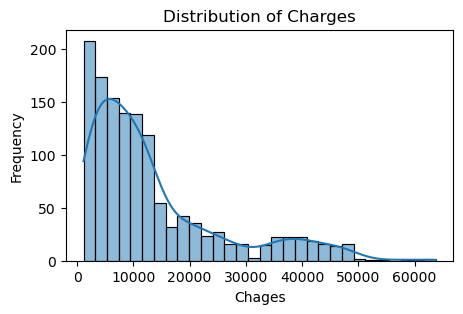

In [73]:
plt.figure(figsize=(5,3))
sns.histplot(df['charges'],kde=True)
plt.title('Distribution of Charges')
plt.xlabel('Chages')
plt.ylabel('Frequency')

C:\Users\shraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of charges')

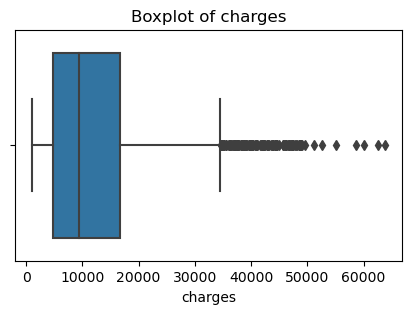

In [74]:
plt.figure(figsize=(5,3))
sns.boxplot(df['charges'])
plt.title('Boxplot of charges')

In [75]:
print('mean',np.mean(df.charges))
print('median',np.median(df.charges))
print('standard_deviation',np.std(df.charges))

mean 13270.422265141257
median 9382.033
standard_deviation 12105.484975561605


Data is right skewed looks like there are some outliers median is charge is 9382 standard deviation is quite high.

Most of the target data scattered around 5000 to 15000.

### analysing age and   charges vs age

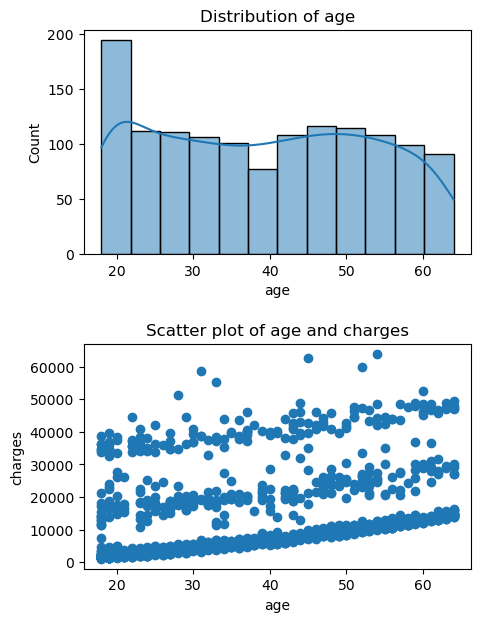

In [101]:
fig,axes=plt.subplots(2,1,figsize=(5,7))
plt.subplots_adjust(wspace=4,hspace=0.4)
hist_plot=sns.histplot(df.age,kde=True,ax=axes[0])
hist_plot.set_title('Distribution of age')
axes[1].scatter(x=df.age,y=df.charges)
axes[1].set_title('Scatter plot of age and charges')
axes[1].set_xlabel('age')
axes[1].set_ylabel('charges')
plt.show()


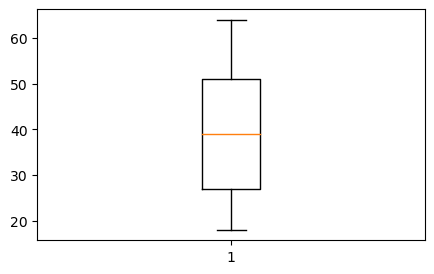

In [77]:
plt.figure(figsize=(5,3))
plt.boxplot(df.age)
plt.show()

Looks like there is decent realtion between age and charges but it doesnt looks like age contributes a lot(when alone) for predicting charges

Looks like no outlier in age column

lets check the relation between age and charges by fitting simple linear regression

In [78]:
#note we will look at r2 score since it tells us how  much variaiton in charges is captured by relation between charge and age

slr=LinearRegression()
slr.fit(df[['age']],df[['charges']])
predicted=slr.predict(df[['age']])
print("r2_score (amount variation in charges captured by reltion between charges and age) : ",r2_score(df[['charges']],predicted))

r2_score (amount variation in charges captured by reltion between charges and age) :  0.08940589967885804


Ok r2 score is low so it doesnt look like it contributes a lot. But it may contribute well in presence of other variables.

#### Analysing effect of sex smoker and region on age

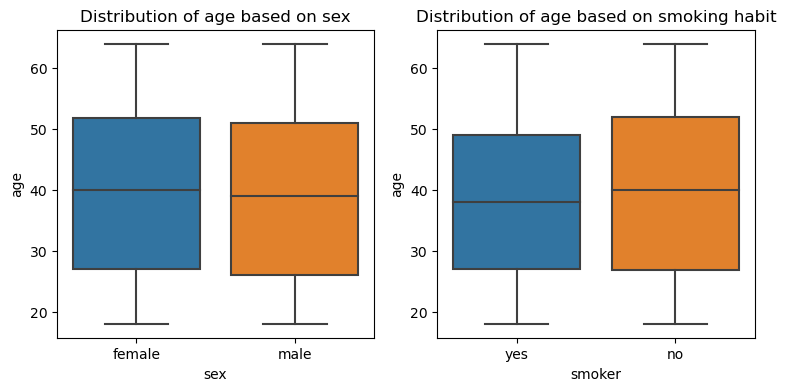

In [79]:
fig,axes=plt.subplots(1,2,figsize=(9,4))
axes1=sns.boxplot(y='age',x='sex',data=df,ax=axes[0])
axes2=sns.boxplot(y='age',x='smoker',data=df,ax=axes[1])
axes1.set_title('Distribution of age based on sex')
axes2.set_title("Distribution of age based on smoking habit")
plt.show()

<Figure size 640x480 with 0 Axes>

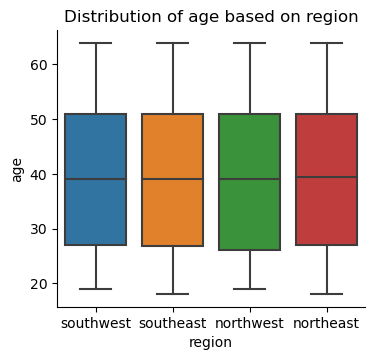

In [80]:
fig=plt.figure()
sns.catplot(y='age',x='region',data=df,kind='box',height=3.5,aspect=1.1)
plt.title('Distribution of age based on region')
plt.show()

Looks like there is no (individual) effect of sex,gender,region on distribution of age.

Lets see whether there is any interaction effect of categories on age so we can know whether there will be any multicollinearity problems in future or not

In [83]:
import pandas as pd
import statsmodels.api as sm
from scipy.stats import levene

# Assuming 'df' is your DataFrame with columns 'age', 'sex', 'region'

# Fit the ANOVA model
formula = 'age ~ C(sex) + C(region) +C(smoker)+ C(sex):C(region)+C(sex):C(smoker)+C(region):C(smoker)+C(region):C(sex):C(smoker)'
model = sm.formula.ols(formula, data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(sex),81.754286,1.0,0.411446,0.521348
C(region),35.838958,3.0,0.060122,0.980686
C(smoker),139.994875,1.0,0.704555,0.401409
C(sex):C(region),23.359598,3.0,0.039187,0.989645
C(sex):C(smoker),18.471759,1.0,0.092963,0.760491
C(region):C(smoker),808.893966,3.0,1.356978,0.254402
C(region):C(sex):C(smoker),112.938819,3.0,0.189463,0.903608
Residual,262681.204176,1322.0,NaN,NaN


#### analysing relation between age and bmi

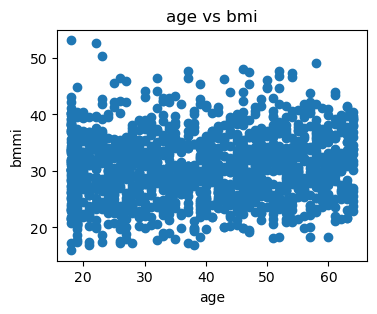

In [90]:
plt.figure(figsize=(4,3))
plt.scatter(x=df['age'],y=df['bmi'])
plt.title('age vs bmi')
plt.xlabel('age')
plt.ylabel('bmmi')
plt.show()

looks like there is no relation between age and bmi

In [93]:
lr=LinearRegression()
lr.fit(df[['bmi']],df[['age']])
prdct=lr.predict(df[['bmi']])
r2_score(df[['age']],prdct)

0.011940344097157052

r2 score is too low so looks like there is no direct relation between age and bmi

Ok so far in our analysis there is less relation between age and charges 

In addition looks like there is no effect of other variables on age (so there wont be problem of multicollinearity problem on age column)

### Analysing bmi and bmi vs charges

Text(0.5, 1.0, 'Distribution of bmi')

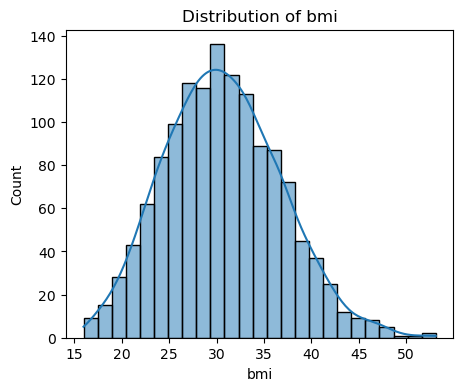

In [100]:
plt.figure(figsize=(5,4))
sns.histplot(df['bmi'],kde=True)
plt.title("Distribution of bmi")

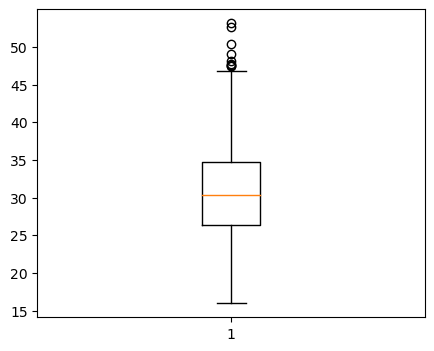

In [109]:
plt.figure(figsize=(5,4))
plt.boxplot(df['bmi'])
plt.show()

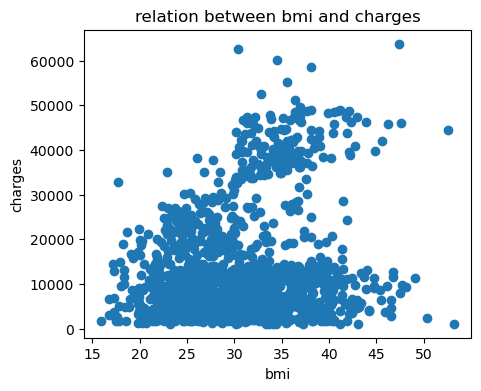

In [106]:
plt.figure(figsize=(5,4))
plt.scatter(df['bmi'],df['charges'])
plt.title('relation between bmi and charges')
plt.xlabel('bmi')
plt.ylabel('charges')
plt.show()

Bmi is almost normally distributed with few outliers and there is no any sharp relation between bmi and charges.

In [115]:
df.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


### Analysing sex   and sex vs charges

In [118]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

Text(0.5, 1.0, 'Distribution of charges based on sex')

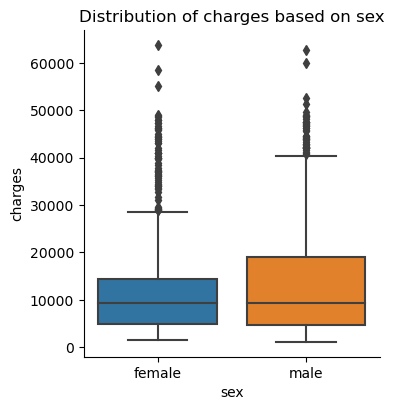

In [130]:
sns.catplot(y='charges',x='sex',data=df,kind='box',height=4,aspect=1)
plt.title('Distribution of charges based on sex')

Looks like there is slight effect of sex on insurance charges.
and category is well balanced

### analysing children 

In [113]:
df.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

Text(0.5, 1.0, 'distribution of charge based on no.of children covered in insurance')

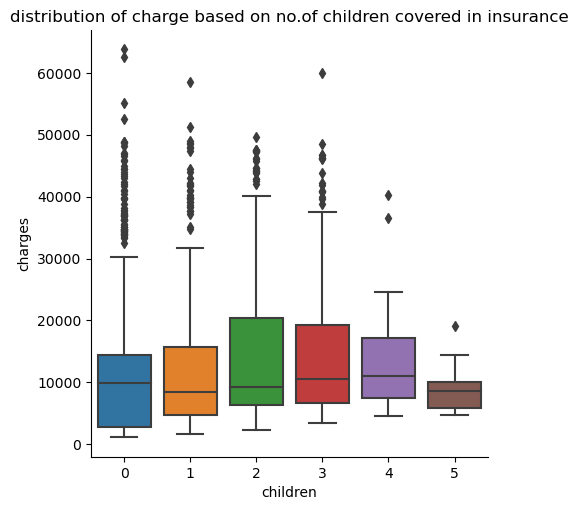

In [137]:
sns.catplot(x='children',y='charges',data=df,kind='box')
plt.title('distribution of charge based on no.of children covered in insurance')

There are very less observation for children count 5 and 4

One can check the relation between children and charges using one way anova but since we will be using either backward,forward or stepwise regression we dont need to wory much about it right now (our data is also small so no need to worry )

#### smoker

In [139]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

Text(0.5, 1.0, 'distribution of charge based on smoker')

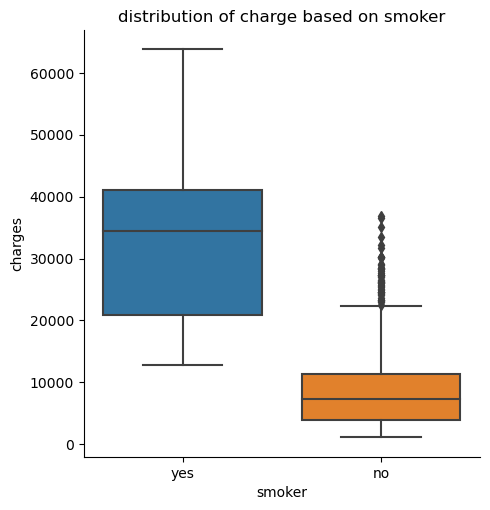

In [140]:
sns.catplot(x='smoker',y='charges',data=df,kind='box')
plt.title('distribution of charge based on smoker')

Smoker class seem to be imbalanced 

Looks like there is effect of smoking habbit on insurance charges

In [141]:
df.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


#### region

In [142]:
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

Text(0.5, 1.0, 'distribution of charge based on region')

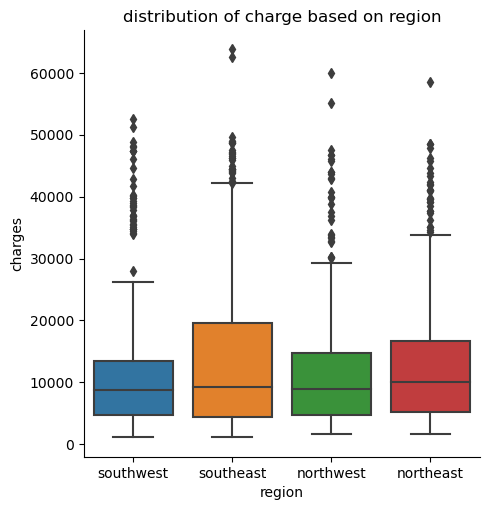

In [143]:
sns.catplot(x='region',y='charges',data=df,kind='box')
plt.title('distribution of charge based on region')

Looks like there is no high influence of region on charges 

region categories are well balanced.